## Project: Wrangle and analyze data of WeRateDogs

### <font color='blue'>Table of Contents</font>

* [Gathering](#step0)
* [Assessing](#step1)
* [Cleaning](#step2) 
* [Saving and Storing data](#step3)
* [Analyzing and visualizing data](#step4)


### Introduction

This project aims to put in practice what we have learned in the data wrangling section and how to manage data in three steps:

- Gathering
- Assesing
- Cleaning

The data is taken form the archive of a Twitter page called WeRateDogs and it has over 8 million followers.

<a id='step0'></a>
## <font color='blue'>Gathering</font>


In [1]:
#Import needed packages
import pandas as pd
import numpy as np
import requests
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline
import time

#### 1- Import data from twitter-archive-enhanced.csv file

In [33]:
#import data from 'twitter-archive-enhanced.csv' file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.sort_values('timestamp')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None


In [34]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### 2- Import data from 'image-prediction.tsv'

In [35]:
#Download url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response= requests.get(url)

with open('image-predictioncs.tsv', mode = 'wb')as file:
    file.write(response.content)
#Read the tsv file

image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')
    
    

In [36]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### 3- Twitter API and JSON

In [113]:
#https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
import tweepy
auth = tweepy.OAuthHandler('5Uur0mo4ol2kB8yhtZ1VxXS0u', 'h8E7fSpXWiMoBel7G1ZOAeu4Mgru0v0MtxH5ehYE1RKM89SiBH')
auth.set_access_token('303562412-ct9aNnU0FQR0UKJVn1i1W3Y8omqSewiQWUcRaygB', 'D3qslrbdOU5fqTOp951kOIuZbkeTPBodnjNYoEGFR63Ft')
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [38]:
#Download Tweepy status object based on Tweet ID and store it in a list
list_of_tweets = []
# Tweets that cannott be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in twitter_archive['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

Rate limit reached. Sleeping for: 737
Rate limit reached. Sleeping for: 736


In [39]:
print("The list of tweets" ,len(list_of_tweets))
print("The list of tweets not found" , len(cant_find_tweets_for_those_ids))

The list of tweets 2337
The list of tweets not found 19


In [40]:
# Block the json part of each Tweepy status that was downloaded and add them
#to a list

my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)

In [41]:
# Add them to a txt file

with open('tweet_json.txt','w') as file:
    file.write(json.dumps(my_list_of_dicts, indent=4))

In [42]:
#Create dataframe called tweet json to identify info from json dictionaries
my_demo_list = []

with open('tweet_json.txt', encoding='utf-8') as json_file:
    all_data = json.load(json_file)
    
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status == 'This is a retweet'
            url = 'This is a retweet'
            
        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status})

        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])

In [43]:
#See infortmation of the new data frame
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 8 columns):
tweet_id            2337 non-null object
favorite_count      2337 non-null int64
retweet_count       2337 non-null int64
followers_count     2337 non-null int64
friends_count       2337 non-null int64
source              2337 non-null object
retweeted_status    2337 non-null object
url                 2337 non-null object
dtypes: int64(4), object(4)
memory usage: 146.1+ KB


In [44]:
#view the head of table
tweet_json.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,37558,8192,8028808,12,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,32282,6059,8028808,12,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,24319,4008,8028808,12,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,40906,8347,8028808,12,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,39101,9040,8028808,12,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


#### Gathring summary

Data was gathered from different resources:
- using pandas read_csv to read 'twitter-archive-enhanced.csv'
- using requests to get data from a url
- using tweepy with Twitter API

now that we have all the data gathered we should start assessing.

<a id='step1'></a>
## <font color='blue'>Assessing</font>

#### Visual assessment

In [45]:
#Display data for visual assessment data
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [46]:
#Displaying image_prediction data
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [47]:
#A display of tweet_json data
tweet_json

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,37558,8192,8028808,12,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,32282,6059,8028808,12,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,24319,4008,8028808,12,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,40906,8347,8028808,12,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,39101,9040,8028808,12,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
5,891087950875897856,19662,3002,8028808,12,Twitter for iPhone,Original tweet,https://t.co/xx5cilW0Dd
6,890971913173991426,11494,1985,8028808,12,Twitter for iPhone,Original tweet,https://t.co/MV01Q820LT
7,890729181411237888,63368,18201,8028808,12,Twitter for iPhone,Original tweet,https://t.co/hrcFOGi12V
8,890609185150312448,27030,4120,8028808,12,Twitter for iPhone,Original tweet,https://t.co/UkrdQyoYxV
9,890240255349198849,30971,7113,8028808,12,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0


In this data frame we only need to keep tweet_id, favorite_count and retweet_count. Other coloumns are not needed.


#### Programmatic assessment


In [48]:
#info of twitter_archive data to see data types and no. of entries
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [49]:
#See description of twitter archive
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [50]:
twitter_archive.duplicated().sum()

0

In [51]:
#Looking closer at the numerator and denominator
#Check for tweet text that has ratings with decimal numerator

twitter_archive.loc[twitter_archive.text.str.contains(r"(\d+\.\d*\/\d+)")].text

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


45      This is Bella. She hopes her smile made you sm...
340     RT @dog_rates: This is Logan, the Chow who liv...
695     This is Logan, the Chow who lived. He solemnly...
763     This is Sophie. She's a Jubilant Bush Pupper. ...
1689    I've been told there's a slight possibility he...
1712    Here we have uncovered an entire battalion of ...
Name: text, dtype: object

In [52]:
#Check rating numerator in text vs rating_numerator column.
twitter_archive[twitter_archive['text'].str.contains('\d+\.\d*\/\d+')]



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


In [53]:
#Checking for numerator that are not 10
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [54]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [55]:
#Check for tweets that has denominator that is not 10
twitter_archive[twitter_archive['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [56]:
#Now let's check dogs' names to see if they are well formatted
twitter_archive.name.value_counts()

None           745
a               55
Charlie         12
Cooper          11
Oliver          11
Lucy            11
Tucker          10
Penny           10
Lola            10
Bo               9
Winston          9
the              8
Sadie            8
Toby             7
an               7
Daisy            7
Buddy            7
Bailey           7
Stanley          6
Oscar            6
Leo              6
Koda             6
Scout            6
Bella            6
Jack             6
Jax              6
Rusty            6
Milo             6
Dave             6
Chester          5
              ... 
Ben              1
Tino             1
Jockson          1
Pumpkin          1
Jiminus          1
DayZ             1
Carbon           1
Mutt             1
Evy              1
Jarvis           1
Wesley           1
Opie             1
Kuyu             1
Loomis           1
Sprinkles        1
Shelby           1
Samsom           1
Alfy             1
Tobi             1
Shakespeare      1
Jessiga          1
Rascal      

In [57]:
#Some names begin with lowercase letter, let's explore them
twitter_archive.loc[(twitter_archive.name.str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


They don't seem to be real names actually!

In [58]:
#Check the no. of retweets.
len((twitter_archive[twitter_archive['text'].str.startswith('RT') == True]))

183

In [59]:
#Check for name included in text column and not in name column
twitter_archive[twitter_archive['text'].str.contains('name to|name is|names are')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
168,859607811541651456,NaN,NaN,2017-05-03 03:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Sorry for the lack of posts today. I came home...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859607811...,13,10,None,None,None,None,puppo
843,766714921925144576,7.667118e+17,4.196984e+09,2016-08-19 19:14:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",His name is Charley and he already has a new s...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
852,765395769549590528,NaN,NaN,2016-08-16 03:52:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is my dog. Her name is Zoey. She knows I'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769...,13,10,my,None,None,None,None
1678,682047327939461121,NaN,NaN,2015-12-30 03:55:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We normally don't rate bears but this one seem...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682047327...,10,10,None,None,None,None,None
1734,679736210798047232,NaN,NaN,2015-12-23 18:51:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pup's name is Sabertooth (parents must be...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679736210...,9,10,None,None,None,None,None
2267,667524857454854144,NaN,NaN,2015-11-20 02:08:22 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Another topnotch dog. His name is Big Jumpy Ra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667524857...,12,10,None,None,None,None,None
2287,667177989038297088,NaN,NaN,2015-11-19 03:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Dasani Kingfisher from Maine. His na...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667177989...,8,10,a,None,None,None,None
2306,666835007768551424,NaN,NaN,2015-11-18 04:27:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These are Peruvian Feldspars. Their names are ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666835007...,10,10,None,None,None,None,None


In [60]:
#Show sample of image prediction
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1094,719991154352222208,https://pbs.twimg.com/media/Cf3sH62VAAA-LiP.jpg,2,golden_retriever,0.605304,True,cocker_spaniel,0.130948,True,Labrador_retriever,0.094692,True
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,0.012601,False,coyote,0.000057,False
1706,817536400337801217,https://pbs.twimg.com/media/C1h4_MEXUAARxQF.jpg,2,pug,0.971358,True,French_bulldog,0.028518,True,Boston_bull,0.000086,True
658,682389078323662849,https://pbs.twimg.com/media/CXhVKtvW8AAyiyK.jpg,1,curly-coated_retriever,0.482288,True,flat-coated_retriever,0.315286,True,Great_Dane,0.062179,True
1007,709198395643068416,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1,borzoi,0.490783,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True
1658,810984652412424192,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True
1114,724771698126512129,https://pbs.twimg.com/media/Cg7n_-OU8AA5RR1.jpg,2,German_short-haired_pointer,0.835491,True,bluetick,0.058788,True,English_setter,0.037208,True
225,670338931251150849,https://pbs.twimg.com/media/CU2FsRnVAAA3TEg.jpg,1,cairn,0.245033,True,West_Highland_white_terrier,0.137709,True,miniature_schnauzer,0.089173,True
1773,828011680017821696,https://pbs.twimg.com/media/C32wOLcWYAAjNqS.jpg,1,American_Staffordshire_terrier,0.936662,True,Staffordshire_bullterrier,0.032999,True,bull_mastiff,0.017183,True
933,703356393781329922,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,1,Border_collie,0.894842,True,collie,0.097364,True,English_springer,0.003037,True


In [61]:
#Find tweets with no images
twitter_archive['expanded_urls'].isnull().value_counts()

False    2297
True       59
Name: expanded_urls, dtype: int64

In [62]:
#Information of image_prediction to see data types and no. of entries
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [63]:
#A description of image_prediction data
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [64]:
#See if there are duplicated tweet ids
image_prediction.tweet_id.duplicated().sum()

0

In [65]:
#See if there are duplicated jpg_urls
image_prediction.jpg_url.duplicated().sum()

66

In [66]:
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [67]:
#Tweet_json data description
tweet_json.describe()

,favorite_count,retweet_count,followers_count,friends_count
count,2337.000000,2337.000000,2.337000e+03,2337.0
mean,7848.437741,2879.062473,8.028850e+06,12.0
std,12164.303826,4863.842341,6.834829e+01,0.0
min,0.000000,1.000000,8.028808e+06,12.0
25%,1364.000000,580.000000,8.028813e+06,12.0
50%,3421.000000,1345.000000,8.028845e+06,12.0
75%,9619.000000,3357.000000,8.028850e+06,12.0
max,162223.000000,82507.000000,8.029476e+06,12.0


In [68]:
#The information about tweet_json data
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 8 columns):
tweet_id            2337 non-null object
favorite_count      2337 non-null int64
retweet_count       2337 non-null int64
followers_count     2337 non-null int64
friends_count       2337 non-null int64
source              2337 non-null object
retweeted_status    2337 non-null object
url                 2337 non-null object
dtypes: int64(4), object(4)
memory usage: 146.1+ KB


In [69]:
#A sample of tweet_json
tweet_json.sample(10)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
1595,685315239903100929,3468,1140,8028848,12,Twitter for iPhone,Original tweet,https://t.co/QIe7oxkSNo
951,750132105863102464,3790,1358,8028843,12,Twitter for iPhone,Original tweet,https://t.co/dDx2gKefYo
1370,700462010979500032,4281,1889,8028846,12,Twitter for iPhone,Original tweet,https://t.co/ALO02IAKCn
1332,704113298707505153,1914,590,8028846,12,Twitter for iPhone,Original tweet,https://t.co/XpYMBQ1FD8
1178,717047459982213120,6458,2002,8028845,12,Twitter for iPhone,Original tweet,https://t.co/fGgleFiBPq
106,871102520638267392,20481,5402,8028809,12,Twitter for iPhone,Original tweet,https://t.co/AbBLh2FZCH
480,813202720496779264,9699,1944,8028812,12,Twitter for iPhone,Original tweet,https://t.co/cD967DjnIn
1790,676864501615042560,2148,739,8028890,12,Twitter for iPhone,Original tweet,https://t.co/NJj2uP0atK
352,829141528400556032,25526,7892,8028811,12,Twitter for iPhone,Original tweet,https://t.co/rHwfySggqR
345,830173239259324417,0,6065,8028811,12,Twitter for iPhone,{'created_at': 'Thu Dec 15 02:14:29 +0000 2016...,This is a retweet


#### Assessment summary

#### Quality:


- Change in datatype is needed in (tweet_id, source, timestamp, img_num and dog stages).
- Dog name needs to be edited and to be accurate. (some dogs are named 'a', or 'an').
- There are 183 retweets to be deleted.
- Sources need to be clearly defined.
- Some tweets don't include images.
- Delete duplicated jpg_url entries.
- Some denominators are of value other than 10.
- There are decimal numbers in ratings.

#### Tidiness:

- Merge the three datasets into one dataset using tweet_id.
- Dog stages need to be in one column instead of four.



<a id='step2'></a>
## <font color='blue'>Cleaning</font>


In [70]:
#first create copies of all files to clean them
ta_clean = twitter_archive.copy()
ip_clean = image_prediction.copy()
tj_clean = tweet_json.copy()

In [71]:
ta_clean.info()
ip_clean.info()
tj_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Now we will start dealing with some of the quality and tidiness issues mentioned above.
Will begin with tidiness issues as to edit the remaining data after deleting what is unnecessary.



#### Define
Doing some changes to be able to merge datasets
- changing tweet_id data type
- dropping some unnecessary columns

#### Code

In [72]:
#Changing data types
ip_clean['tweet_id']= ip_clean['tweet_id'].astype(str)
ta_clean['tweet_id']=ta_clean['tweet_id'].astype(str)

ip_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [73]:
#Delete unneccessary columns in ta_clean and ip_clean
ta_clean = ta_clean.drop(['source','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                          'retweeted_status_user_id', 'retweeted_status_timestamp', 
                            'expanded_urls'], 1)


In [74]:
ip_clean = ip_clean.drop(['p1_conf','p1_dog', 'p2_conf','p2_dog', 'p3_conf','p3_dog'], 1)

#### Test

In [75]:
#See the result
ta_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(2), object(8)
memory usage: 184.1+ KB


In [76]:
ip_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p2          2075 non-null object
p3          2075 non-null object
dtypes: int64(1), object(5)
memory usage: 97.3+ KB


#### Define

put all dog stages into one column

#### Code

In [77]:
#Merge dog stages into one column
ta_clean = pd.melt(ta_clean, id_vars=['tweet_id',                                          
                                                                'timestamp',
                                                                'text',
                                                                'rating_numerator',
                                                                'rating_denominator',
                                                                'name'],
                               var_name='dogs', value_name='dog_stages')


In [78]:
#Drop dogs column
del ta_clean['dogs']

#Now arrange by dogs stages and then remove duplicates based on tweet_id except for the last occurance

ta_clean = ta_clean.sort_values('dog_stages').drop_duplicates(subset='tweet_id', keep='last')

#### Test

In [79]:
ta_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2259 to 7236
Data columns (total 7 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
dog_stages            2356 non-null object
dtypes: int64(2), object(5)
memory usage: 147.2+ KB


#### Define

Merge all datasets into one dataset

#### Code

In [80]:
#Merge  datasets

df1 = pd.merge(ta_clean, ip_clean, left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')

# Join df4 with df2_clean (Image Predictions)
df2 = pd.merge(df1, tj_clean, left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')



In [81]:
#Only keep rows that has images
df2 = df2[df2['jpg_url'].notnull()]


In [82]:
#Save the new data set for upcoming work
df2.to_csv('twitter_archive_final.csv', index=False)

In [83]:
df_clean = pd.read_csv('twitter_archive_final.csv')

#### Test

In [84]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2065 entries, 0 to 2064
Data columns (total 19 columns):
tweet_id              2065 non-null int64
timestamp             2065 non-null object
text                  2065 non-null object
rating_numerator      2065 non-null int64
rating_denominator    2065 non-null int64
name                  2065 non-null object
dog_stages            2065 non-null object
jpg_url               2065 non-null object
img_num               2065 non-null int64
p1                    2065 non-null object
p2                    2065 non-null object
p3                    2065 non-null object
favorite_count        2065 non-null int64
retweet_count         2065 non-null int64
followers_count       2065 non-null int64
friends_count         2065 non-null int64
source                2065 non-null object
retweeted_status      2065 non-null object
url                   2065 non-null object
dtypes: int64(8), object(11)
memory usage: 306.6+ KB


### Working on data quality
#### Define

Get the right data types

#### Code

In [85]:
df_clean['timestamp']= pd.to_datetime(df_clean['timestamp'])
df_clean['source']= df_clean['source'].astype('category')
df_clean['img_num'] = df_clean.astype('category')
df_clean['dog_stages'] = df_clean['dog_stages'].astype('category')


#### Test

In [86]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2065 entries, 0 to 2064
Data columns (total 19 columns):
tweet_id              2065 non-null int64
timestamp             2065 non-null datetime64[ns]
text                  2065 non-null object
rating_numerator      2065 non-null int64
rating_denominator    2065 non-null int64
name                  2065 non-null object
dog_stages            2065 non-null category
jpg_url               2065 non-null object
img_num               2065 non-null object
p1                    2065 non-null object
p2                    2065 non-null object
p3                    2065 non-null object
favorite_count        2065 non-null int64
retweet_count         2065 non-null int64
followers_count       2065 non-null int64
friends_count         2065 non-null int64
source                2065 non-null category
retweeted_status      2065 non-null object
url                   2065 non-null object
dtypes: category(2), datetime64[ns](1), int64(7), object(9)
memory usag

#### Define
Work on dogs name that are inaccurate

#### Code

In [87]:
df_clean.name.value_counts()

None         575
a             55
Charlie       10
Tucker        10
Cooper        10
Lucy          10
Penny         10
Oliver        10
Bo             8
Sadie          8
Lola           8
Winston        8
the            7
Toby           7
Daisy          7
an             7
Bella          6
Jax            6
Koda           6
Rusty          6
Dave           6
Stanley        6
Bailey         6
Scout          6
Milo           6
Oscar          5
Leo            5
Chester        5
Louis          5
Larry          5
            ... 
Liam           1
Hero           1
Nugget         1
Tebow          1
Dobby          1
Kollin         1
Shnuggles      1
Strudel        1
Torque         1
Leonidas       1
Jarvis         1
Eve            1
Wesley         1
Opie           1
Walker         1
Angel          1
Kuyu           1
Loomis         1
Rorie          1
Birf           1
Clyde          1
Sprinkles      1
Shelby         1
Samsom         1
Kevon          1
Alfy           1
Evy            1
Tobi          

In [88]:
df_clean.name.str.lower()

0               none
1               none
2               none
3             george
4               kial
5                  a
6               none
7              frank
8               none
9               dook
10              none
11              hall
12          philippe
13              none
14         naphaniel
15                 a
16             olive
17                 a
18              otis
19              none
20      cleopatricia
21              erik
22               stu
23           tedrick
24            calvin
25              none
26                 a
27              none
28             filup
29              none
            ...     
2035          millie
2036            none
2037         pickles
2038            none
2039            none
2040         sampson
2041            lily
2042          stuart
2043          cooper
2044       sebastian
2045          bayley
2046           tonks
2047            kilo
2048           betty
2049            none
2050            loki
2051         

In [89]:
#Create a list of dogs names that seem incorrect
dogs_names = ['None', 'a', 'the', 'an', 'this', 'such', 'quite', 'not', 'one', 'incredibly', 'mad', 'very', 'just', 'my']

for word in dogs_names:
    df_clean.loc[df_clean.name == word, 'name']= None

#### Test

In [90]:
df_clean.name.value_counts()

Penny         10
Charlie       10
Tucker        10
Cooper        10
Lucy          10
Oliver        10
Sadie          8
Lola           8
Winston        8
Bo             8
Daisy          7
Toby           7
Milo           6
Dave           6
Stanley        6
Scout          6
Bella          6
Koda           6
Jax            6
Bailey         6
Rusty          6
Larry          5
Chester        5
Leo            5
Louis          5
Oscar          5
Buddy          5
Alfie          5
Oakley         4
Phil           4
              ..
Brandonald     1
Rupert         1
Ulysses        1
Liam           1
Hero           1
Strudel        1
Jessiga        1
Tobi           1
Walker         1
Chuck          1
Jonah          1
Shnuggles      1
Torque         1
Leonidas       1
Jarvis         1
Eve            1
Wesley         1
Opie           1
Willie         1
Evy            1
Kuyu           1
Rorie          1
Birf           1
Clyde          1
Sprinkles      1
Shelby         1
Samsom         1
Kevon         

#### Define
Remove tweets that begin with RT as they are retweets.

#### Code

In [91]:
df_clean.loc[df_clean['text'].str.startswith('Rt') == False]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,p1,p2,p3,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,667550904950915073,2015-11-20 03:51:52,RT @dogratingrating: Exceptional talent. Origi...,12,10,None,None,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,667550904950915073,web_site,vizsla,collie,0,35,8028895,12,Twitter Web Client,{'created_at': 'Fri Nov 20 03:43:06 +0000 2015...,This is a retweet
1,667550882905632768,2015-11-20 03:51:47,RT @dogratingrating: Unoriginal idea. Blatant ...,5,10,None,None,https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg,667550882905632768,web_site,dishwasher,oscilloscope,0,33,8028895,12,Twitter Web Client,{'created_at': 'Fri Nov 20 03:41:59 +0000 2015...,This is a retweet
2,667549055577362432,2015-11-20 03:44:31,Never seen dog like this. Breathes heavy. Tilt...,1,10,None,None,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,667549055577362432,electric_fan,spotlight,lampshade,5769,2296,8028895,12,Twitter Web Client,Original tweet,https://t.co/i9iSGNn3fx
3,667546741521195010,2015-11-20 03:35:20,Here is George. George took a selfie of his ne...,9,10,George,None,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,667546741521195010,toy_poodle,miniature_poodle,teddy,331,125,8029476,12,Twitter Web Client,Original tweet,https://t.co/afRtVsoIIb
4,667544320556335104,2015-11-20 03:25:43,"This is Kial. Kial is either wearing a cape, w...",10,10,Kial,None,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,667544320556335104,Pomeranian,Pembroke,Chihuahua,863,529,8028895,12,Twitter Web Client,Original tweet,https://t.co/8zcwIoiuqR
5,667538891197542400,2015-11-20 03:04:08,This is a southwest Coriander named Klint. Hat...,9,10,None,None,https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg,667538891197542400,Yorkshire_terrier,silky_terrier,Australian_terrier,203,65,8028895,12,Twitter Web Client,Original tweet,https://t.co/IQTOMqDUIe
6,667724302356258817,2015-11-20 15:20:54,What a dog to start the day with. Very calm. L...,7,10,None,None,https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg,667724302356258817,ibex,bighorn,ram,481,319,8028895,12,Twitter Web Client,Original tweet,https://t.co/0nIxPTDWAZ
7,667534815156183040,2015-11-20 02:47:56,"This is Frank (pronounced ""Fronq""). Too many b...",8,10,Frank,None,https://pbs.twimg.com/media/CUOPYI5UcAAj_nO.jpg,667534815156183040,Pembroke,Cardigan,cocker_spaniel,812,541,8028895,12,Twitter Web Client,Original tweet,https://t.co/CpPxD28IpV
8,667524857454854144,2015-11-20 02:08:22,Another topnotch dog. His name is Big Jumpy Ra...,12,10,None,None,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,667524857454854144,hare,dhole,Chesapeake_Bay_retriever,1684,1110,8028895,12,Twitter Web Client,Original tweet,https://t.co/seESNzgsdm
9,667517642048163840,2015-11-20 01:39:42,This is Dook &amp; Milo. Dook is struggling to...,8,10,Dook,None,https://pbs.twimg.com/media/CUN_wiBUkAAakT0.jpg,667517642048163840,Italian_greyhound,standard_poodle,cocker_spaniel,366,193,8028895,12,Twitter Web Client,Original tweet,https://t.co/fh5KflzBR0


In [92]:
df_clean = df_clean.loc[df_clean['text'].str.startswith('RT') == False]

### Test

In [93]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1989 entries, 2 to 2064
Data columns (total 19 columns):
tweet_id              1989 non-null int64
timestamp             1989 non-null datetime64[ns]
text                  1989 non-null object
rating_numerator      1989 non-null int64
rating_denominator    1989 non-null int64
name                  1357 non-null object
dog_stages            1989 non-null category
jpg_url               1989 non-null object
img_num               1989 non-null object
p1                    1989 non-null object
p2                    1989 non-null object
p3                    1989 non-null object
favorite_count        1989 non-null int64
retweet_count         1989 non-null int64
followers_count       1989 non-null int64
friends_count         1989 non-null int64
source                1989 non-null category
retweeted_status      1989 non-null object
url                   1989 non-null object
dtypes: category(2), datetime64[ns](1), int64(7), object(9)
memory usag

### Define
replace missing dog stages with None.

### Code

In [94]:
types_stages= ['dog_stages']

for dog_stages in types_stages:
    df_clean.loc[df_clean[dog_stages] == 'None', dog_stages] = None



### Test

In [95]:
df_clean.dog_stages.value_counts()

pupper     212
doggo       63
puppo       23
floofer      8
None         0
Name: dog_stages, dtype: int64

### Define

remove all href tags to read easily

### Code

In [96]:
import re 

href_tags = re.compile(r'<[^>]+>')

def remove_tags(text):
    return href_tags.sub('', text)

df_clean['source'] = df_clean['source'].apply(remove_tags)

### Test

In [97]:
df_clean.source.sample(10)

1783    Twitter for iPhone
535     Twitter for iPhone
1843    Twitter for iPhone
38      Twitter for iPhone
1853    Twitter for iPhone
1398    Twitter for iPhone
862     Twitter for iPhone
606     Twitter for iPhone
1204    Twitter for iPhone
1589    Twitter for iPhone
Name: source, dtype: category
Categories (3, object): [TweetDeck, Twitter Web Client, Twitter for iPhone]

In [98]:
df_clean.source.value_counts()

Twitter for iPhone    1951
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

#### Define

Delete duplicated jpg_url rows

#### Code

In [99]:
#Delete duplicated jpg_url entries
df_clean = df_clean.drop_duplicates(subset=['jpg_url'], keep='last')


#### Test

In [100]:
df_clean.jpg_url.duplicated().sum()

0

#### Define

Fix numerator and denominator issues and make values with decimals same as mentioned in text

#### Code

In [101]:
#View text that has rating in it
text_rating = df_clean[df_clean.text.str.contains(r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text


text_rating

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


4       This is Kial. Kial is either wearing a cape, w...
13      Two dogs in this one. Both are rare Jujitsu Py...
45      These are Peruvian Feldspars. Their names are ...
95      This is Spark. He's nervous. Other dog hasn't ...
104     This is an Albanian 3 1/2 legged  Episcopalian...
250     This may be the greatest video I've ever been ...
254     Meet Oliviér. He takes killer selfies. Has a d...
285     This is Socks. That water pup w the super legs...
372     This is Eriq. His friend just reminded him of ...
388     When bae says they can't go out but you see th...
407     Meet Fynn &amp; Taco. Fynn is an all-powerful ...
417     Happy 4/20 from the squad! 13/10 for all https...
446     This is Bluebert. He just saw that both #Final...
482     After so many requests, this is Bretagne. She ...
589     Meet Travis and Flurp. Travis is pretty chill ...
659     10/10 for dog. 7/10 for cat. 12/10 for human. ...
678     Meet Holly. She's trying to teach small human-...
788     Here w

In [102]:
#Now make sure the numerator is of the right value mentioned in text and denominator is equal to 10
for entry in text_rating:
    mask = df_clean.text == entry
    column1 = 'rating_numerator'
    column2 ='rating_denominator'
    df_clean.loc[mask, column1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)
    df_clean.loc[mask, column2] = 10


#### Test

In [103]:
pd.set_option('display.max_colwidth', -1)
df_clean[df_clean.text.isin(text_rating)]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,p1,p2,p3,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
4,667544320556335104,2015-11-20 03:25:43,"This is Kial. Kial is either wearing a cape, which would be rad, or flashing us, which would be rude. 10/10 or 4/10 https://t.co/8zcwIoiuqR",4,10,Kial,NaN,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,667544320556335104,Pomeranian,Pembroke,Chihuahua,863,529,8028895,12,Twitter Web Client,Original tweet,https://t.co/8zcwIoiuqR
13,667491009379606528,2015-11-19 23:53:52,Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10 https://t.co/ITxxcc4v9y,8,10,None,NaN,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,667491009379606528,borzoi,ice_bear,weasel,529,225,8028895,12,Twitter Web Client,Original tweet,https://t.co/ITxxcc4v9y
45,666835007768551424,2015-11-18 04:27:09,These are Peruvian Feldspars. Their names are Cupit and Prencer. Both resemble Rand Paul. Sick outfits 10/10 &amp; 10/10 https://t.co/ZnEMHBsAs1,10,10,None,NaN,https://pbs.twimg.com/media/CUES51dXIAEahyG.jpg,666835007768551424,Airedale,toy_poodle,teddy,210,80,8028896,12,Twitter for iPhone,Original tweet,https://t.co/ZnEMHBsAs1
95,668537837512433665,2015-11-22 21:13:35,This is Spark. He's nervous. Other dog hasn't moved in a while. Won't come when called. Doesn't fetch well 8/10&amp;1/10 https://t.co/stEodX9Aba,1,10,Spark,NaN,https://pbs.twimg.com/media/CUcfnWlWsAAzlwE.jpg,668537837512433665,Lakeland_terrier,toy_poodle,Chihuahua,251,77,8028895,12,Twitter for iPhone,Original tweet,https://t.co/stEodX9Aba
104,666287406224695296,2015-11-16 16:11:11,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,9,10,None,NaN,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,666287406224695296,Maltese_dog,toy_poodle,miniature_poodle,142,63,8028896,12,Twitter for iPhone,Original tweet,https://t.co/d9NcXFKwLv
250,695064344191721472,2016-02-04 02:00:27,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",13,10,None,NaN,https://pbs.twimg.com/ext_tw_video_thumb/695064251149508610/pu/img/0OPED0aUurb9Z16a.jpg,695064344191721472,seat_belt,sunglasses,ice_lolly,1658,632,8028845,12,Twitter for iPhone,Original tweet,https://t.co/uaJmNgXR2P
254,694352839993344000,2016-02-02 02:53:12,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,5,10,Oliviér,NaN,https://pbs.twimg.com/media/CaLWOPfWkAAo2Dt.jpg,694352839993344000,Australian_terrier,Yorkshire_terrier,silky_terrier,2116,652,8028845,12,Twitter for iPhone,Original tweet,https://t.co/6NgsQJuSBJ
285,703356393781329922,2016-02-26 23:10:06,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,2,10,Socks,NaN,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,703356393781329922,Border_collie,collie,English_springer,1985,404,8028846,12,Twitter for iPhone,Original tweet,https://t.co/8rc5I22bBf
372,690400367696297985,2016-01-22 05:07:29,This is Eriq. His friend just reminded him of last year's super bowl. Not cool friend\n10/10 for Eriq\n6/10 for friend https://t.co/PlEXTofdpf,6,10,Eriq,NaN,https://pbs.twimg.com/media/CZTLeBuWIAAFkeR.jpg,690400367696297985,Pembroke,papillon,Shetland_sheepdog,1947,474,8028848,12,Twitter for iPhone,Original tweet,https://t.co/PlEXTofdpf
388,691483041324204033,2016-01-25 04:49:38,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,10,10,None,NaN,https://pbs.twimg.com/media/CZikKBIWYAA40Az.jpg,691483041324204033,bloodhound,black-and-tan_coonhound,Gordon_setter,2467,589,8028847,12,Twitter for iPhone,Original tweet

In [104]:
#Change datatype of numerator and denominator to float to allow decimals.

df_clean[['rating_numerator', 'rating_denominator']] = df_clean[['rating_numerator','rating_denominator']].astype(float)


In [105]:
#Display tweets that has decimals in ratings in text
df_clean[df_clean['text'].str.contains('\d+\.\d*\/\d+')]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,p1,p2,p3,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
205,883482846933004288,2017-07-08 00:28:19,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0,10.0,Bella,NaN,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,883482846933004288,golden_retriever,Labrador_retriever,kuvasz,44585,9582,8029432,12,Twitter for iPhone,Original tweet,https://t.co/qjrljjt948
906,680494726643068929,2015-12-25 21:06:00,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0,10.0,None,NaN,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,680494726643068929,kuvasz,Samoyed,Great_Pyrenees,1779,510,8028849,12,Twitter for iPhone,Original tweet,https://t.co/eNm2S6p9BD
1680,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10.0,Logan,NaN,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,786709082849828864,Pomeranian,Persian_cat,chow,19218,6582,8028813,12,Twitter for iPhone,Original tweet,https://t.co/yBO5wuqaPS
2009,778027034220126208,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10.0,Sophie,pupper,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,778027034220126208,clumber,cocker_spaniel,Lhasa,6888,1739,8028814,12,Twitter for iPhone,Original tweet,https://t.co/PxjSmYHfYo


In [106]:
#Update numerators

df_clean.loc[(df_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
df_clean.loc[(df_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
df_clean.loc[(df_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
df_clean.loc[(df_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
df_clean.loc[(df_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26


#### Test

In [107]:
with pd.option_context('max_colwidth', 200):
    display(df_clean[df_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
205,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
906,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0
1680,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
2009,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0


#### Define

Just before starting to analyze data, I will add a colmn for rating to this dataset.

#### Code

In [118]:
#Create a new column with rating and converting it to a float
df_clean['rating'] = 10 * df_clean['rating_numerator'] / df_clean['rating_denominator'].astype(float)

#TEST
df_clean.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,p1,p2,p3,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url,rating
794,668633411083464705,2015-11-23 03:33:22,This is Churlie. He likes bagels. 10/10 https://t.co/k8P6FZlzAG,10.0,10.0,Churlie,NaN,https://pbs.twimg.com/media/CUd2ieCUcAAexyT.jpg,668633411083464705,Pekinese,Shih-Tzu,Japanese_spaniel,2811,1669,8028895,12,Twitter for iPhone,Original tweet,https://t.co/k8P6FZlzAG,10.0
1029,674372068062928900,2015-12-08 23:36:44,Meet Chesney. On the outside he stays calm &amp; collected. On the inside he's having a complete mental breakdown. 10/10 https://t.co/G4m0TFY9uc,10.0,10.0,Chesney,NaN,https://pbs.twimg.com/media/CVvZ0KTWwAAdXKV.jpg,674372068062928900,seashore,American_alligator,sandbar,852,322,8028890,12,Twitter for iPhone,Original tweet,https://t.co/G4m0TFY9uc,10.0
1739,826958653328592898,2017-02-02 01:01:21,This is Loki. He smiles like Elvis. Ain't nothin but a hound doggo. 12/10 https://t.co/QV5nx6otZR,12.0,10.0,Loki,doggo,https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg,826958653328592898,golden_retriever,Labrador_retriever,tennis_ball,22543,5354,8028811,12,Twitter for iPhone,Original tweet,https://t.co/QV5nx6otZR,12.0
303,700167517596164096,2016-02-18 03:58:39,This is Dotsy. She's stuck as hell. 10/10 https://t.co/A0h4lnhU4s,10.0,10.0,Dotsy,NaN,https://pbs.twimg.com/media/Cbd-o8hWwAE4OFm.jpg,700167517596164096,beagle,Pembroke,Siberian_husky,2733,780,8028845,12,Twitter for iPhone,Original tweet,https://t.co/A0h4lnhU4s,10.0
10,667495797102141441,2015-11-20 00:12:54,This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i,9.0,10.0,Philippe,NaN,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,667495797102141441,Chihuahua,Christmas_stocking,ski_mask,514,271,8028895,12,Twitter Web Client,Original tweet,https://t.co/5NhPV8E45i,9.0


In [119]:
rating = df_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
df_clean['rating_numerator'] = rating['rating_numerator'].astype(float)
df_clean['rating_denominator'] = rating['rating_denominator'].astype(float)


#### Test

In [120]:
df_clean.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,p1,p2,p3,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url,rating
1132,809920764300447744,2016-12-17 00:38:52,"Please only send in dogs. We only rate dogs, not seemingly heartbroken ewoks. Thank you... still 10/10 would console https://t.co/HIraYS1Bzo",10.0,10.0,NaN,NaN,https://pbs.twimg.com/media/Cz1qo05XUAQ4qXp.jpg,809920764300447744,Norwich_terrier,toy_poodle,miniature_poodle,16360,4226,8028813,12,Twitter for iPhone,Original tweet,https://t.co/HIraYS1Bzo,10.0
1945,699434518667751424,2016-02-16 03:25:58,I know this is a tad late but here's a wonderful Valentine's Day pupper 12/10 https://t.co/hTE2PEwGvi,12.0,10.0,NaN,pupper,https://pbs.twimg.com/media/CbTj--1XEAIZjc_.jpg,699434518667751424,golden_retriever,kuvasz,Labrador_retriever,2236,530,8028845,12,Twitter for iPhone,Original tweet,https://t.co/hTE2PEwGvi,12.0
521,707776935007539200,2016-03-10 03:55:45,This is Sadie. She's a Bohemian Rhapsody. Remarkably portable. Could sneak on roller coasters with (probably). 11/10 https://t.co/DB8fyeDs8B,11.0,10.0,Sadie,NaN,https://pbs.twimg.com/media/CdKHWimWoAABs08.jpg,707776935007539200,miniature_pinscher,toy_terrier,Chihuahua,3388,993,8028846,12,Twitter for iPhone,Original tweet,https://t.co/DB8fyeDs8B,11.0
1130,809220051211603969,2016-12-15 02:14:29,This is Kyro. He's a Stratocumulus Flop. Tongue ejects at random. Serious h*ckin condition. Still 12/10 would pet passionately https://t.co/wHu15q2Q6p,12.0,10.0,Kyro,NaN,https://pbs.twimg.com/media/CzrtWDbWEAAmIhy.jpg,809220051211603969,Pomeranian,Samoyed,Pembroke,21062,6065,8028813,12,Twitter for iPhone,Original tweet,https://t.co/2JjYys5zMP,12.0
1058,676821958043033607,2015-12-15 17:51:44,Finally some constructive political change in this country. 11/10 https://t.co/mvQaETHVSb,11.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CWSN-vaXAAA8Ehr.jpg,676821958043033607,Great_Pyrenees,kuvasz,standard_poodle,23578,16261,8028890,12,Twitter for iPhone,Original tweet,https://t.co/mvQaETHVSb,11.0


<a id='step3'></a>
## <font color='blue'>Saving and storing data</font>

In [3]:
df_clean.to_csv('twitter_archive_master.csv', index=False)

In [ ]:
df_clean = pd.read_csv('twitter_archive_master.csv')

In [4]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 19 columns):
tweet_id              1989 non-null int64
timestamp             1989 non-null object
text                  1989 non-null object
rating_numerator      1989 non-null float64
rating_denominator    1989 non-null float64
name                  1357 non-null object
dog_stages            306 non-null object
jpg_url               1989 non-null object
img_num               1989 non-null int64
p1                    1989 non-null object
p2                    1989 non-null object
p3                    1989 non-null object
favorite_count        1989 non-null int64
retweet_count         1989 non-null int64
followers_count       1989 non-null int64
friends_count         1989 non-null int64
source                1989 non-null object
retweeted_status      1989 non-null object
url                   1989 non-null object
dtypes: float64(2), int64(6), object(11)
memory usage: 295.3+ KB


<a id='step4'></a>
## <font color='blue'>Analyzing and Visualizing data</font>


#### 1-The most popular dog type

In [5]:
#Sum favorites for each dog type and show dogs with highest scores
dog_favorites = df_clean.groupby('p1')['favorite_count'].sum().sort_values(ascending=False).head(10)
dog_favorites

p1
golden_retriever      1636772
Labrador_retriever    1029260
Pembroke               962778
Chihuahua              668081
Samoyed                497569
French_bulldog         452833
chow                   393845
pug                    303121
cocker_spaniel         299037
Pomeranian             294506
Name: favorite_count, dtype: int64

In [6]:
#Sum retweets for each dog type and show dogs with highest scores
dog_retweets = df_clean.groupby('p1')['retweet_count'].sum().sort_values(ascending=False).head(10)
dog_retweets

p1
golden_retriever      473066
Labrador_retriever    331649
Pembroke              263068
Chihuahua             212847
Samoyed               163752
French_bulldog        113562
chow                  110760
Pomeranian            101366
cocker_spaniel         93513
Eskimo_dog             92003
Name: retweet_count, dtype: int64

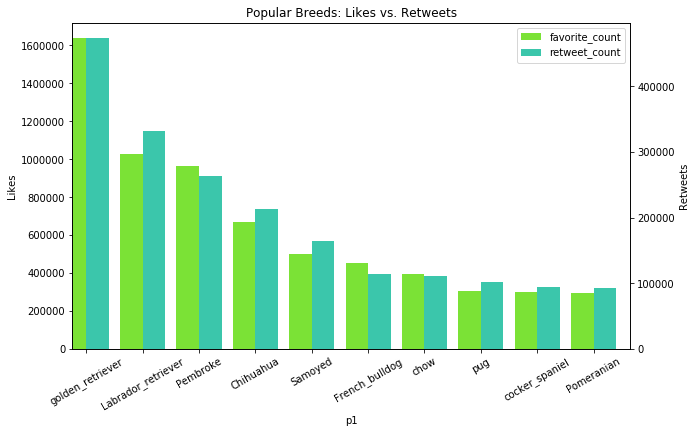

In [7]:
#PLot
#Create matplotlib figure
fig = plt.figure() 

ax = fig.add_subplot(111) 
ax2 = ax.twinx()

width = 0.4

dog_favorites.plot(figsize = (10,6), kind='bar', color='#7be236', ax=ax, width=width, position=1, title='Popular Breeds: Likes vs. Retweets')
dog_retweets.plot(figsize = (10,6), kind='bar', color='#3bc6ab', ax=ax2, width=width, position=0)

#Turning off grids
ax.grid(False)
ax2.grid(False)

ax.set_ylabel('Likes')
ax2.set_ylabel('Retweets')

ax.set_xticklabels(dog_favorites.index, rotation=30)

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=1)
plt.show()
plt.savefig('PopularBreeds.png')


#### 2-Most common dog stage:

In [8]:
#Count values of each dog stage
dog_stages_count = df_clean['dog_stages'].value_counts()
dog_stages_count

pupper     212
doggo       63
puppo       23
floofer      8
Name: dog_stages, dtype: int64

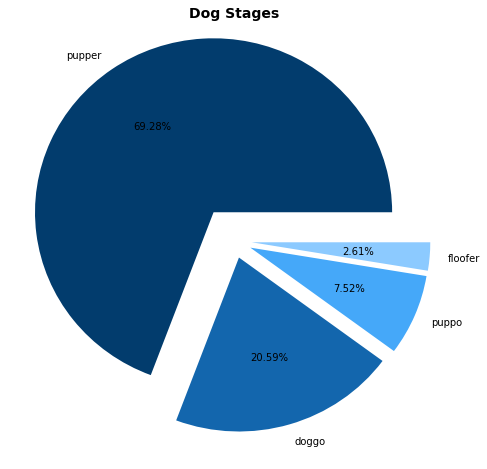

In [9]:
#Plot a pie plot

explode = (0.2, 0.1, 0.1, 0.1) 
colors = ['#023c6d','#1366ad','#45a8f9','#8ccaff']
dog_stages_count.sort_values(ascending=False).plot.pie(legend=False, subplots=True, figsize=(8,8), autopct='%.2f%%', explode=explode,colors = colors)
plt.ylabel('')
plt.title('Dog Stages', weight='bold', fontsize=14)
plt.savefig('Dog_Stages.png')


#### 3- Most popular name:

In [10]:
#View the most common names in the dataset
dogs_names_count = df_clean['name'].value_counts().head(10)
dogs_names_count

Lucy       10
Charlie    10
Cooper     10
Oliver     10
Penny       9
Tucker      9
Sadie       8
Winston     8
Lola        7
Daisy       7
Name: name, dtype: int64

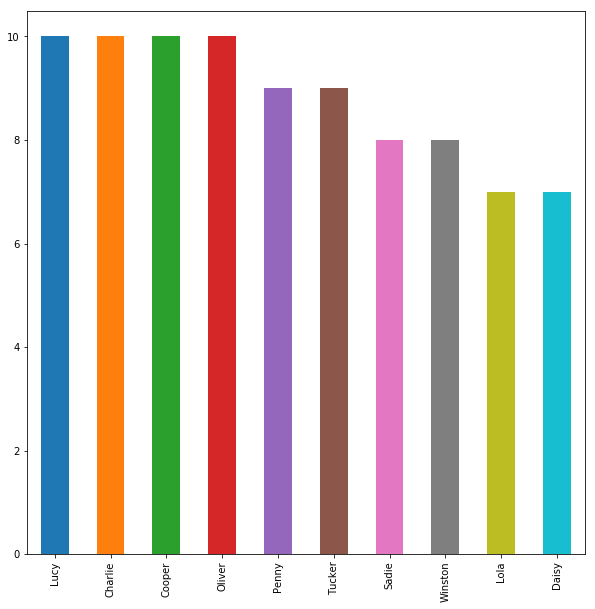

In [11]:
dogs_names_count.plot(kind='bar', figsize=(10,10), x='Names', y='Number of dogs');
plt.savefig('Dognames.png')


#### 4 - What is the source of retweets?

In [12]:
#Sort the values of tweet sources
source_count = df_clean['source'].value_counts()
source_count

Twitter for iPhone    1951
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

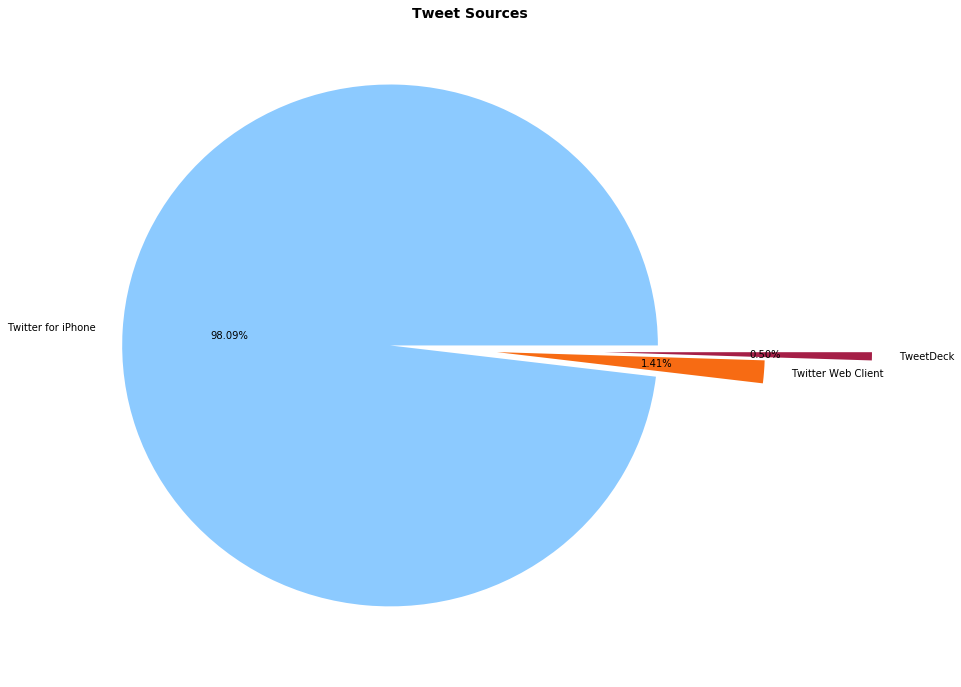

In [13]:
#Show in pie plot
explode = (0.3, 0.1, 0.5) 
colors = ['#8ccaff','#f76b13','#a51f47','#45a8f9']
source_count.sort_values(ascending=False).plot.pie(legend=False, subplots=True, figsize=(12,12), autopct='%.2f%%', explode=explode,colors = colors)
plt.ylabel('')
plt.title('Tweet Sources', weight='bold', fontsize=14)
plt.savefig('TweetSources.png')


#### 5 - The most predictable breed of dogs:

In [14]:
#Value counts
p1_count = df_clean['p1'].value_counts().head(10)
p1_count

golden_retriever      139
Labrador_retriever     93
Pembroke               88
Chihuahua              79
pug                    54
chow                   41
Samoyed                39
toy_poodle             38
Pomeranian             38
malamute               29
Name: p1, dtype: int64

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


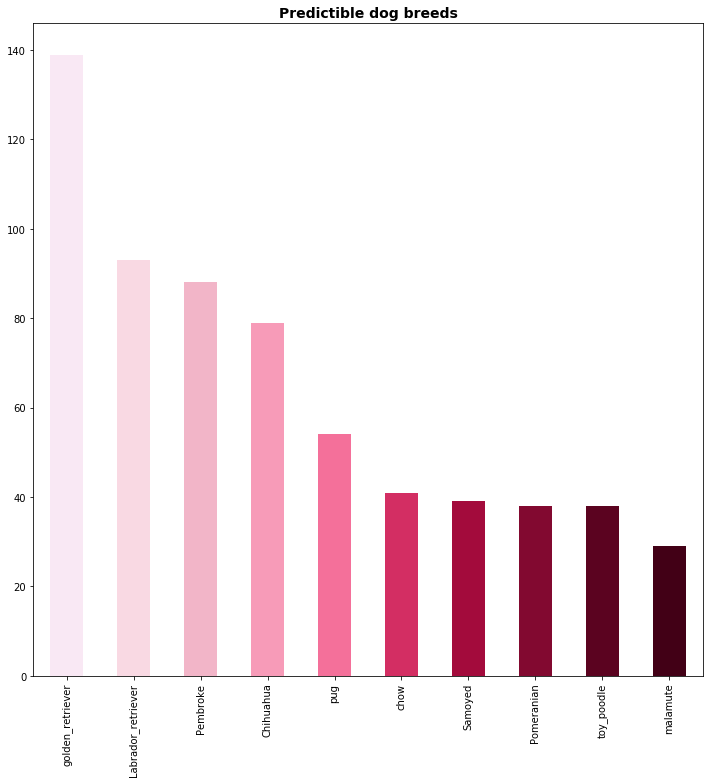

In [16]:
#Show in pie chart

colors = ['#f9e8f4','#f9d9e3','#f2b5c8','#f79bb8','#f4709a', '#d32e63','#a30b3c','#820930','#5b0320','#420016']
p1_count.sort_values(ascending=False).plot.bar(legend=False, subplots=True, figsize=(12,12),colors = colors)
plt.ylabel('')
plt.title('Predictible dog breeds', weight='bold', fontsize=14)
plt.savefig('Pred_dogbreeds.png')


#### 6 - What is retweet and favorite rate over time?

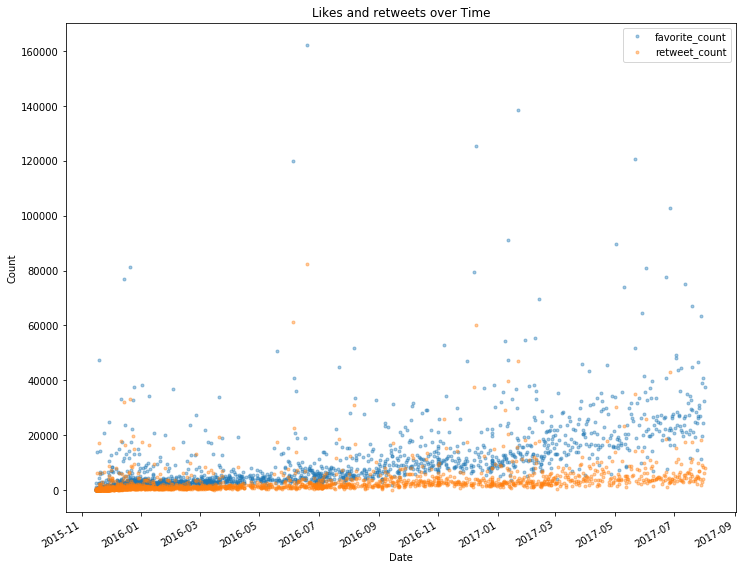

In [72]:
#convert timestamp to datetime data type
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])
df_clean.set_index('timestamp', inplace=True)
#Plot details
x = df_clean[['favorite_count', 'retweet_count']].plot(style = '.', alpha = .4, figsize=(12, 10))
x.grid(False)
plt.title('Likes and retweets over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.savefig('Likes&Retweets.png')
plt.show()

#### 7- What is the relation between retweet count and rating?

In [75]:
df_clean.sample(10)

,tweet_id,text,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,p1,p2,p3,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url,rating
timestamp,,,,,,,,,,,,,,,,,,,
2016-01-03 02:53:17,683481228088049664,Meet Banjo. He's a Peppercorn Shoop Da Whoop. ...,11.0,10.0,Banjo,pupper,https://pbs.twimg.com/media/CXw2jSpWMAAad6V.jpg,683481228088049664,keeshond,chow,German_shepherd,2738,1052,8023339,12,Twitter for iPhone,Original tweet,https://t.co/H7NZFumpKq,11.0
2016-08-17 20:27:34,766008592277377025,This is Angel. She stole the @ShopWeRateDogs s...,11.0,10.0,Angel,NaN,https://pbs.twimg.com/media/CqFouXOXYAAYpzG.jpg,766008592277377025,Welsh_springer_spaniel,basset,Brittany_spaniel,3928,527,8023320,12,Twitter for iPhone,Original tweet,https://t.co/jaivZ1dcUL,11.0
2015-11-24 03:29:51,668994913074286592,Two gorgeous pups here. Both have cute fake ho...,5.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CUi_UtnWIAEtfqz.jpg,668994913074286592,hog,English_springer,French_bulldog,438,233,8023359,12,Twitter for iPhone,Original tweet,https://t.co/w5oYFXi0uh,5.0
2016-01-25 17:35:00,691675652215414786,This is Richie and Plip. They are the best of ...,10.0,10.0,Richie,NaN,https://pbs.twimg.com/media/CZlTVL4WkAEpVR5.jpg,691675652215414786,Chihuahua,teddy,West_Highland_white_terrier,2017,530,8023339,12,Twitter for iPhone,Original tweet,https://t.co/KMdwNgONkV,10.0
2015-12-16 23:29:14,677269281705472000,This is the happiest pupper I've ever seen. 10...,10.0,10.0,NaN,pupper,https://pbs.twimg.com/media/CWYk0WxWoAAEwRt.jpg,677269281705472000,Shetland_sheepdog,collie,German_shepherd,2048,736,8023339,12,Twitter for iPhone,Original tweet,https://t.co/ep8ATEJwRb,10.0
2015-11-25 03:06:32,669351434509529089,This is Sully. He's a Leviticus Galapagos. Ver...,10.0,10.0,Sully,NaN,https://pbs.twimg.com/media/CUoDk8mWsAAMyBL.jpg,669351434509529089,cuirass,breastplate,bulletproof_vest,437,189,8023359,12,Twitter for iPhone,Original tweet,https://t.co/zKNF77dxEA,10.0
2017-01-09 00:53:55,818259473185828864,This is Florence. He saw the same snap you sen...,12.0,10.0,Florence,NaN,https://pbs.twimg.com/media/C1sKo_QUkAALtkw.jpg,818259473185828864,miniature_schnauzer,toy_poodle,standard_schnauzer,11590,2457,8023317,12,Twitter for iPhone,Original tweet,https://t.co/rnkvT2kvib,12.0
2015-11-23 04:13:37,668643542311546881,Fascinating dog here. Loves beach. Oddly long ...,3.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CUd_wYRWUAAZsKr.jpg,668643542311546881,common_iguana,frilled_lizard,sandbar,880,538,8023359,12,Twitter for iPhone,Original tweet,https://t.co/IiSdmhkC5N,3.0
2016-02-08 17:58:03,696754882863349760,This is Reptar. He specifically asked for his ...,10.0,10.0,Reptar,NaN,https://pbs.twimg.com/media/Cate3eLUcAEIuph.jpg,696754882863349760,weasel,toy_poodle,Scottish_deerhound,1536,373,8023339,12,Twitter for iPhone,Original tweet,https://t.co/l9k7TPP7Tp,10.0


In [86]:
rating_count = df_clean['rating'].value_counts().head(10)
rating_count

12/10    449
10/10    417
11/10    396
13/10    259
9/10     150
8/10      95
7/10      51
14/10     35
5/10      32
6/10      32
Name: rating, dtype: int64

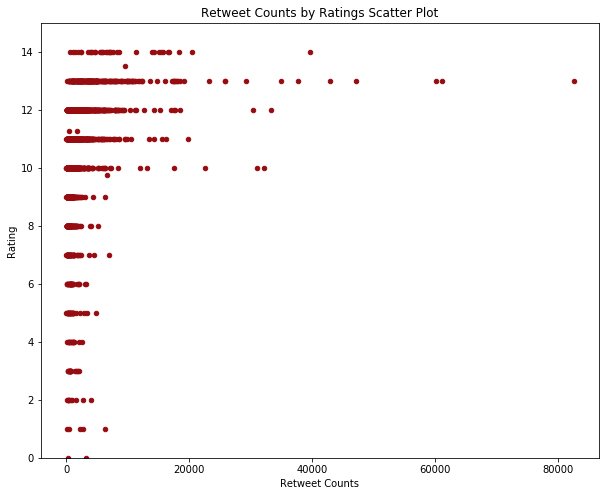

In [105]:
#plot a scatter plot of retweet_count and rating
df_clean.plot(x='retweet_count', y='rating', kind='scatter',figsize=(10,8), color='#960c10')
#Removing some outliers
plt.ylim(0,15)
plt.xlabel('Retweet Counts')
plt.ylabel('Rating')
plt.title('Retweet Counts by Ratings Scatter Plot')

fig = plt.gcf()
fig.savefig('Retweets_vs_ratings.png',bbox_inches='tight');